## Extract out relevant columns from dataset
- Recipe_id
- Nutritional Components

In [158]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from sklearn.mixture import GaussianMixture
import random

In [159]:
raw_recipes = pd.read_csv("./Dataset/RAW_recipes.csv")
full_dataset = pd.read_csv("./Dataset/train_dataset_all.csv")
full_dataset

,recipe_id,category,name,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),...,log sugar,log sodium,log protein,log sat fat,log carbs,user_id,date,review,rating,description
0,5315,beverages,icy holiday punch,6,1440,54.5,0.0,50.0,0.0,0.0,...,3.912023,0.000000,0.000000,0.000000,1.386294,8629,2001-04-24,I brought this to an office holiday party and ...,4,.
1,8661,salads,oliveau salad dressing,8,20,168.7,28.0,3.0,3.0,0.0,...,1.098612,1.098612,0.000000,2.484907,0.000000,13483,2001-08-05,Good recipe and easy to make. I found it a li...,4,traditional french dressing -- this recipe was...
2,10859,vegetables,broccoli cauliflower and rice casserole,5,85,228.8,24.0,12.0,46.0,18.0,...,2.484907,3.828641,2.890372,3.465736,1.386294,8629,2001-08-15,This is a nice casserole. It is very easy to ...,2,easy and quick to prepare. grandmother's recip...
3,902,vegetables,microwaved garlic mushroom rolls,7,0,1188.6,88.0,53.0,69.0,75.0,...,3.970292,4.234107,4.317488,5.030438,3.828641,13483,2001-08-16,Very easy to make for a lunch. I served it co...,3,"i use brown flat mushrooms and slice them, i f..."
4,8549,meat,taverns,7,25,347.2,21.0,33.0,24.0,40.0,...,3.496508,3.178054,3.688879,3.218876,2.397895,13483,2001-09-04,A friend of mine loves ketchup so he loved thi...,5,a variation on a loose-meat sandwich. this was...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65179,392968,desserts,cinnamon brownie cupcakes,10,25,194.2,5.0,120.0,3.0,7.0,...,4.787492,1.098612,1.945910,2.197225,2.564949,599450,2010-04-09,These are absolutely to-die-for! Made as direc...,5,warm cinnamon enhances the chocolate flavor in...
65180,297946,vegetables,steamed vegetables with john s dipping sauce,10,27,152.9,15.0,18.0,11.0,5.0,...,2.890372,2.397895,1.609438,1.945910,1.609438,125388,2010-04-09,Very good way to add some extra taste to basic...,5,this combo of vegetables is what is most often...
65181,410482,desserts,the world s fastest chocolate sour cream cake ...,8,30,302.8,13.0,139.0,14.0,8.0,...,4.934474,2.639057,2.079442,3.135494,2.833213,573325,2010-04-09,This cake really is super easy and also super ...,5,"so so so good! so so so little work. well, y..."
65182,347632,pasta,kick butt spaghetti sauce out of a jar,10,20,113.7,10.0,26.0,12.0,3.0,...,3.258097,2.484907,1.098612,2.302585,1.098612,125388,2010-04-09,"Yes, I find that jarred spaghetti sauce needs ...",5,this is a conncoction i came up with tonight; ...


In [160]:
def gaussian_model(x, k):
    gm = GaussianMixture(n_components=k, n_init=10, random_state=42, init_params='kmeans')
    gm.fit(x)
    return (gm.bic(x), gm.aic(x))

### Beverages - low sugar

In [161]:
beverages = full_dataset[['category','log sugar','recipe_id','sugar (PDV)']]
beverages = beverages[beverages['category'] == 'beverages']
beverages.drop_duplicates(inplace=True)
beverages

,category,log sugar,recipe_id,sugar (PDV)
0,beverages,3.912023,5315,50.0
123,beverages,4.882802,13267,132.0
135,beverages,3.784190,13366,44.0
142,beverages,3.951244,15292,52.0
205,beverages,1.098612,15438,3.0
...,...,...,...,...
65067,beverages,4.304065,406002,74.0
65094,beverages,4.795791,410056,121.0
65105,beverages,5.141664,408145,171.0
65130,beverages,5.003946,280859,149.0


In [162]:
# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  7108.8032527165715
aic Score:  7078.157377732013

cluster number:  3
bic score:  6912.059947910018
aic Score:  6863.026547934724

cluster number:  4
bic score:  6939.345032688984
aic Score:  6871.924107722954

cluster number:  5
bic score:  6955.254396979055
aic Score:  6869.44594702229

cluster number:  6
bic score:  6966.154716870812
aic Score:  6861.958741923311

cluster number:  7
bic score:  6984.773116887067
aic Score:  6862.189616948831

cluster number:  8
bic score:  6993.056282962084
aic Score:  6852.085258033113

cluster number:  9
bic score:  6997.445829023829
aic Score:  6838.087279104122

cluster number:  10
bic score:  6999.9880430316325
aic Score:  6822.24196812119

cluster number:  11
bic score:  7026.352327767116
aic Score:  6830.2187278659385

cluster number:  12
bic score:  6679.655738760517
aic Score:  6465.134613868604

cluster number:  13
bic score:  7074.498730117909
aic Score:  6841.590080235261

cluster number:  14
bic score:  669

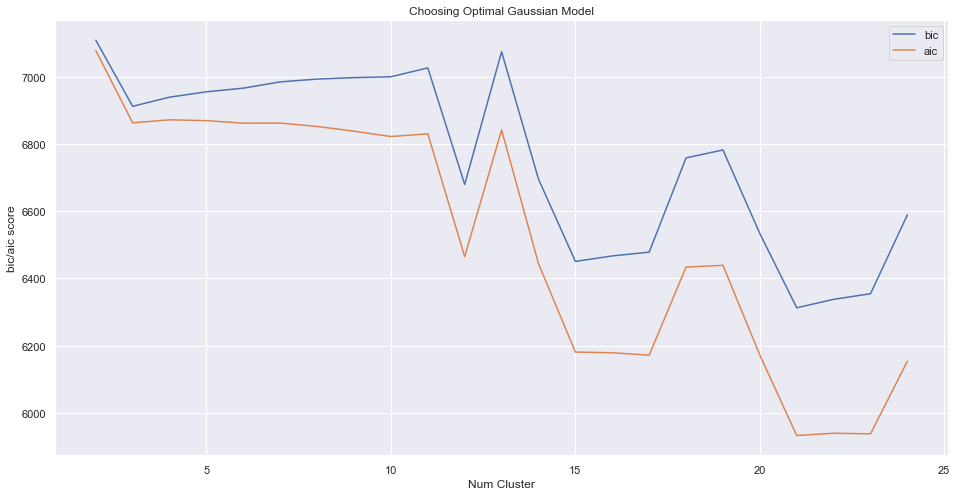

In [163]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [164]:
# selecting the features
x = beverages.iloc[:,1]
x = pd.DataFrame(x)
       
model = GaussianMixture(n_components=21, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
beverages['cluster'] = labels

beverages.groupby('cluster').median()

,log sugar,recipe_id,sugar (PDV)
cluster,,,
0,3.891820,214514.0,49.0
1,0.000000,248539.5,0.0
2,5.225747,198336.5,186.0
3,2.564949,239151.5,13.0
4,6.908755,129992.0,1001.0
5,4.382027,191161.5,80.0
6,3.218876,236130.5,25.0
7,1.098612,210404.0,3.0
8,5.988961,199938.0,399.0


In [217]:
g1_beverage = [1,3,6,7,11,12,18,19,20] # 33 and below

g2_beverage = [0,5,13,15] # 34 - 99

g3_beverage = [2,4,8,9,10,14,16,17] # 100 and above

In [218]:
beverages['groups'] = 0
for i, r in beverages.iterrows():
    if r['cluster'] in g1_beverage:
        beverages.at[i,'groups'] = 1
    elif r['cluster'] in g2_beverage:
        beverages.at[i,'groups'] = 2
    elif r['cluster'] in g3_beverage:
        beverages.at[i,'groups'] = 3

In [219]:
beverages.head()

,category,log sugar,recipe_id,sugar (PDV),cluster,groups
0,beverages,3.912023,5315,50.0,0,2
123,beverages,4.882802,13267,132.0,10,3
135,beverages,3.784190,13366,44.0,0,2
142,beverages,3.951244,15292,52.0,0,2
205,beverages,1.098612,15438,3.0,7,1


In [220]:
for i in range(1, 4):
    recipe = beverages[beverages["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  29592
Recipe Name:  ['my very own summer yogurt cooler  indian lassi']
STEPS: 
['[\'whisk / beat the the yogurt or curds with a wire whisk until smooth\', \'add the water slowly and continue to whisk until well combined\', \'add the seasonings , mix well , and pour into a tall glass to serve immediately\', "alternately , you can double or triple this recipe and store it in the refrigerator , it\'ll keep for a day at least", \'before serving , stir it once , as the seasonings tend to settle at the bottom\', \'enjoy !\']']
DESCRIPTION:
["to beat the heat of the indian summer, you gotta have something that is light and refreshing that'll cool you down. lassi is very popular in india, and is a salted yogurt drink, mixed with some seasonings. this is a great accompaniment for a light lunch consisting of salad and fruit. try it!"]
INGREDIENTS:
["['plain yogurt', 'cold water', 'salt', 'ground cumin', 'pepper', 'paprika']"]

recipe 2:  164175
Recipe Name:  ['bunny s carrot 

## Desserts - sugar

In [165]:
desserts = full_dataset[['category','log sugar','recipe_id','sugar (PDV)']]
desserts = desserts[desserts['category'] == 'desserts']
desserts.drop_duplicates(inplace=True)

In [166]:
# selecting the features
x = desserts.iloc[:,1]
x = pd.DataFrame(x)

# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  26527.848206515435
aic Score:  26492.748071689173

cluster number:  3
bic score:  26442.589780595215
aic Score:  26386.429564873193

cluster number:  4
bic score:  26271.484242476472
aic Score:  26194.263945858693

cluster number:  5
bic score:  24545.191402917484
aic Score:  24446.911025403948

cluster number:  6
bic score:  24564.57354094468
aic Score:  24445.233082535382

cluster number:  7
bic score:  24581.187443689218
aic Score:  24440.786904384164

cluster number:  8
bic score:  24608.325471913045
aic Score:  24446.864851712235

cluster number:  9
bic score:  24632.154793312628
aic Score:  24449.63409221606

cluster number:  10
bic score:  24647.419189581415
aic Score:  24443.838407589086

cluster number:  11
bic score:  24671.3908864655
aic Score:  24446.750023577413

cluster number:  12
bic score:  24688.90789129556
aic Score:  24443.206947511717

cluster number:  13
bic score:  24710.84422672734
aic Score:  24444.083202047736

cluster number:  1

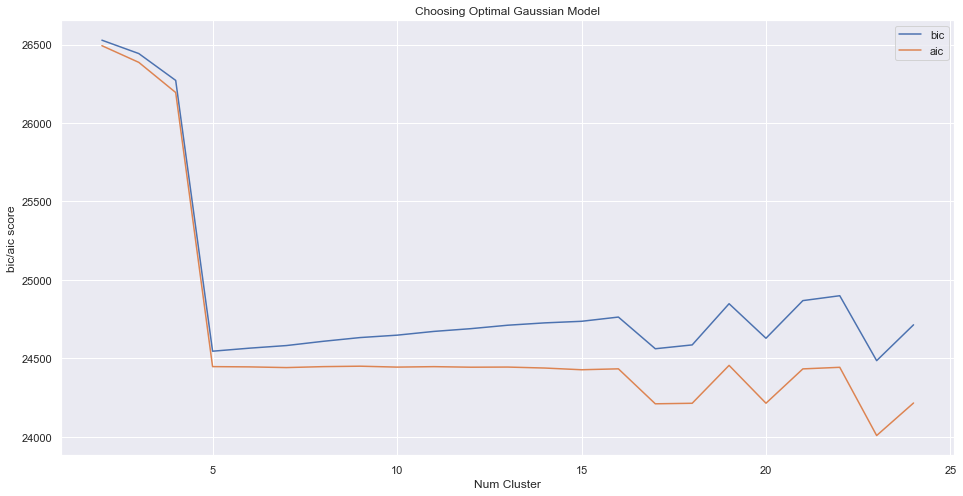

In [167]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [168]:
# selecting the features
x = desserts.iloc[:,1]
x = pd.DataFrame(x)

model = GaussianMixture(n_components=23, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
desserts['cluster'] = labels

desserts.groupby('cluster').median()

,log sugar,recipe_id,sugar (PDV)
cluster,,,
0,4.682131,152296.5,108.0
1,2.564949,170626.0,13.0
2,6.383507,115322.0,592.0
3,3.555348,142573.5,35.0
4,5.117994,135912.0,167.0
5,0.000000,180373.0,0.0
6,7.781139,85055.0,2395.0
7,4.043051,150473.0,57.0
8,5.624018,128149.5,277.0


In [221]:
g1_dessert = [1,5,9,10,14,16,18,21] # 33 and below

g2_dessert = [3,7,11,19,20] # 34 - 99

g3_dessert = [0,2,4,6,8,12,13,15,17,22] # 100 and above

In [222]:
desserts['groups'] = 0
for i, r in desserts.iterrows():
    if r['cluster'] in g1_dessert:
        desserts.at[i,'groups'] = 1
    elif r['cluster'] in g2_dessert:
        desserts.at[i,'groups'] = 2
    elif r['cluster'] in g3_dessert:
        desserts.at[i,'groups'] = 3

In [223]:
import random

for i in range(1, 4):
    recipe = desserts[desserts["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  177372
Recipe Name:  ['chris s favorite cherry jello']
STEPS: 
["['mix jello and water', 'blend in pie filling and chill until slightly thickened', 'otherwise cherries will all sink to bottom', 'make dream whip according to package and then blend in dream whip', 'place in 9x9-inch pan and refrigerate', 'can be easily doubled in a 9x13-inch pan']"]
DESCRIPTION:
['a jello recipe from my mom that she even named after me for our local cookbook. i love it for the deep cherry flavor.  it works great for potlucks or as a side dish to serve with dinner. chill time is cooking time.']
INGREDIENTS:
["['cherry jell-o', 'boiling water', 'dream whip', 'cherry pie filling']"]

recipe 2:  339060
Recipe Name:  ['christmas cranberry nut tassies  mini']
STEPS: 
["['beat 1 / 2 cup butter and cream cheese at medium speed with an electric mixer until creamy', 'gradually add flour , beating well', 'cover and chill dough 1 hour', 'shape dough into 24 balls', 'press 1 dough ball into each l

### Vegetables - sodium

In [176]:
vegetables = full_dataset[['category','log sodium','recipe_id','sodium (PDV)']]
vegetables = vegetables[vegetables['category'] == 'vegetables']
vegetables.drop_duplicates(inplace=True)

In [177]:
x = vegetables.iloc[:,1]
x = pd.DataFrame(x)

# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  16224.715816347461
aic Score:  16188.735623411134

cluster number:  3
bic score:  16252.696711379413
aic Score:  16195.12840268129

cluster number:  4
bic score:  16088.392474669492
aic Score:  16009.236050209573

cluster number:  5
bic score:  16026.091216384762
aic Score:  15925.346676163048

cluster number:  6
bic score:  15970.650953643057
aic Score:  15848.318297659545

cluster number:  7
bic score:  12244.72572632183
aic Score:  12100.804954576524

cluster number:  8
bic score:  12159.310139227095
aic Score:  11993.801251719991

cluster number:  9
bic score:  12099.272901856659
aic Score:  11912.17589858776

cluster number:  10
bic score:  12093.532548004465
aic Score:  11884.84742897377

cluster number:  11
bic score:  8469.343966114902
aic Score:  8239.070731322412

cluster number:  12
bic score:  5207.566489786328
aic Score:  4955.705139232042

cluster number:  13
bic score:  5189.236431385247
aic Score:  4915.786965069165

cluster number:  14
bi

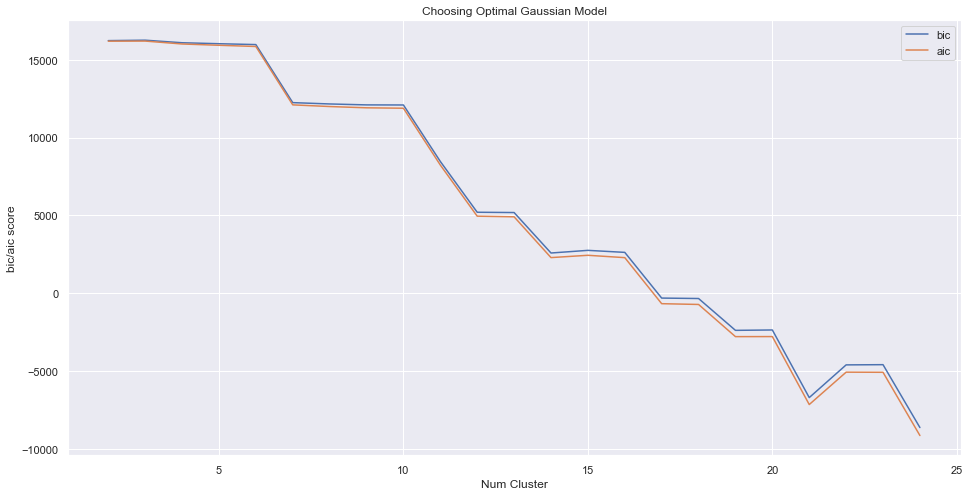

In [178]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [179]:
x = vegetables.iloc[:,1]
x = pd.DataFrame(x)

model = GaussianMixture(n_components=25, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
vegetables['cluster'] = labels

vegetables.groupby('cluster').median()

,log sodium,recipe_id,sodium (PDV)
cluster,,,
0,1.945910,157067.0,7.0
1,3.850148,148713.0,47.0
2,1.098612,145520.0,3.0
3,0.000000,159917.5,0.0
4,2.944439,159432.0,19.0
5,4.488636,156348.0,89.0
6,2.484907,163307.0,12.0
7,7.473909,177352.5,1761.5
8,3.433987,166665.0,31.0


In [224]:
g1_veg = [0,2,3,4,6,8,9,10,12,14,16,17,18,20,21,22,24] # 33 and below

g2_veg = [1,5,13,15] # 34 - 99

g3_veg = [7,11,19,23] # 100 and above

In [225]:
vegetables['groups'] = 0
for i, r in vegetables.iterrows():
    if r['cluster'] in g1_veg:
        vegetables.at[i,'groups'] = 1
    elif r['cluster'] in g2_veg:
        vegetables.at[i,'groups'] = 2
    elif r['cluster'] in g3_veg:
        vegetables.at[i,'groups'] = 3

In [226]:
import random

for i in range(1, 4):
    recipe = vegetables[vegetables["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  243430
Recipe Name:  ['rotisserie vinaigrette chicken salad']
STEPS: 
["['vinaigrette:', 'place all the ingredients in a screw-top jar and shake to combine', 'taste and adjust the seasonings', 'in a large bowl toss romaine lettuce , chicken , cucumber , tomatoes , onion , celery and', 'dressing until evenly coated', 'refrigerate at least 30 minutes']"]
DESCRIPTION:
['a simple and delicious chicken salad you can put together in no time. the flavors of the rotisserie chicken mingled with the vinaigrette dressing and veggies are delightful. this recipe makes extra dressing, so keep some in the fridge for another salad. i always make extra and this recipe accounts for that ;)']
INGREDIENTS:
["['rotisserie-cooked chicken', 'romaine lettuce', 'red onion', 'cherry tomatoes', 'celery', 'cucumber', 'balsamic vinegar', 'extra virgin olive oil', 'water', 'dijon mustard', 'light brown sugar', 'garlic cloves', 'pepper', 'capers']"]

recipe 2:  207330
Recipe Name:  ['corn and bea

### Pasta - fat and sodium

In [180]:
pasta = full_dataset[['category','log fat','log sodium','log sat fat','recipe_id','total fat (PDV)','saturated fat (PDV)','sodium (PDV)']]
pasta = pasta[pasta['category'] == 'pasta']
pasta.drop_duplicates(inplace=True)

In [181]:
x = pd.DataFrame(pasta.iloc[:,1:4])

# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  35909.66467346268
aic Score:  35784.918229180825

cluster number:  3
bic score:  35448.783038899404
aic Score:  35258.38057131131

cluster number:  4
bic score:  28573.907515154235
aic Score:  28317.8490242599

cluster number:  5
bic score:  28423.820242379603
aic Score:  28102.10572817903

cluster number:  6
bic score:  28115.494680941305
aic Score:  27728.124143434492

cluster number:  7
bic score:  28047.05994314296
aic Score:  27594.033382329908

cluster number:  8
bic score:  28070.76899247799
aic Score:  27552.0864083587

cluster number:  9
bic score:  27237.49072167477
aic Score:  26653.152114249242

cluster number:  10
bic score:  26662.218125121057
aic Score:  26012.223494389287

cluster number:  11
bic score:  25881.8451358626
aic Score:  25166.194481824594

cluster number:  12
bic score:  26375.691225653958
aic Score:  25594.38454830971

cluster number:  13
bic score:  25954.607297398743
aic Score:  25107.644596748258

cluster number:  14
bic s

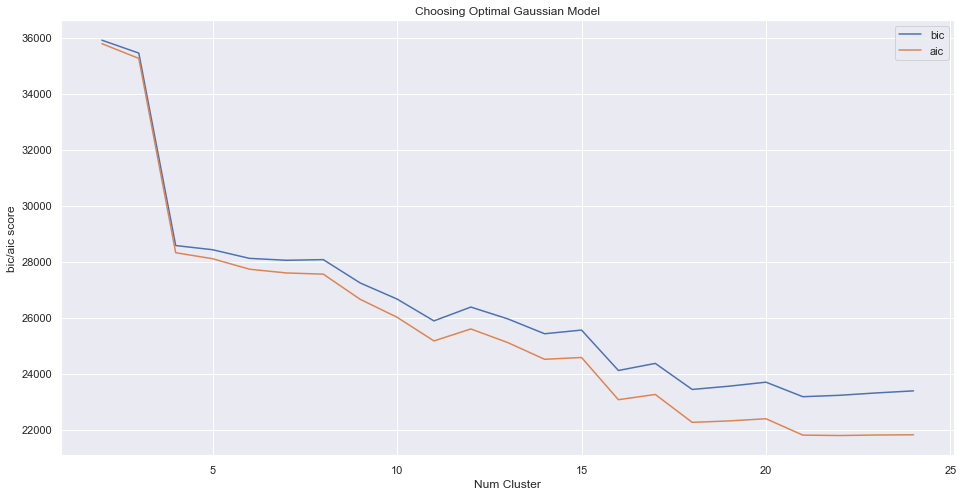

In [182]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [184]:
x = pd.DataFrame(pasta.iloc[:,1:4])

model = GaussianMixture(n_components=21, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
pasta['cluster'] = labels

pasta.groupby('cluster').median()

,log fat,log sodium,log sat fat,recipe_id,total fat (PDV),saturated fat (PDV),sodium (PDV)
cluster,,,,,,,
0,4.110874,4.234107,4.356709,133760.0,61.0,78.0,69.0
1,1.791759,1.791759,1.386294,169662.0,6.0,4.0,6.0
2,3.135494,3.610918,2.890372,143403.5,23.0,18.0,37.0
3,3.555348,2.197225,3.332205,159623.0,35.0,28.0,9.0
4,0.000000,2.397895,0.000000,142979.0,1.0,0.0,11.0
5,3.624252,3.583519,4.110874,166568.5,37.5,61.0,36.0
6,1.791759,2.833213,1.609438,153633.0,6.0,5.0,17.0
7,2.772589,1.098612,2.484907,139227.0,16.0,12.0,3.0
8,1.386294,2.564949,0.693147,166614.0,4.0,2.0,13.0


In [227]:
g1_pasta = [1,4,6,7,8,9,10,11,12,13,14,16,18,19] # all 33 and below

g2_pasta = [0,2,3,5,15,17] # all components more than 33 but less than 100 

g3_pasta = [20] # at least 1 component has 100 or more

In [228]:
pasta['groups'] = 0
for i, r in pasta.iterrows():
    if r['cluster'] in g1_pasta:
        pasta.at[i,'groups'] = 1
    elif r['cluster'] in g2_pasta:
        pasta.at[i,'groups'] = 2
    elif r['cluster'] in g3_pasta:
        pasta.at[i,'groups'] = 3

In [229]:
import random

for i in range(1, 4):
    recipe = pasta[pasta["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  369893
Recipe Name:  ['portuguese chicken soup']
STEPS: 
["['in a large saucepan , add chicken breast , onion , parsley , zest & mint sprig , & simmer until done , about 35 minutes', 'remove the breast & let it cool before stripping off the meat & cutting it into a julienne', 'strain the broth , then return it to the ot & bring it to a boil', 'add pasta & chopped mint , season to taste with salt & white pepper , then heat until pasta is cooked al dente', 'remove from heat , stir in lemon juice & julienned chicken', 'ladle into soup bowls & enjoy !']"]
DESCRIPTION:
['this recipe was found online & is included here to be taken with me on the zaar world tour 5.']
INGREDIENTS:
["['chicken breast', 'onion', 'fresh parsley', 'lemon zest', 'of fresh mint', 'chicken stock', 'thin egg noodles', 'fresh mint leaves', 'salt', 'white pepper', 'fresh lemon juice']"]

recipe 2:  67013
Recipe Name:  ['curried couscous']
STEPS: 
["['pour couscous in a large bowl , melt butter in the

### Seafood - fat and sodium

In [191]:
seafood = full_dataset[['category','log fat','log sodium','log sat fat','recipe_id','total fat (PDV)','saturated fat (PDV)','sodium (PDV)']]
seafood = seafood[seafood['category'] == 'seafood']
seafood.drop_duplicates(inplace=True)

In [192]:
x = pd.DataFrame(seafood.iloc[:,1:4])

# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  15264.52918243796
aic Score:  15156.387702804559

cluster number:  3
bic score:  15103.367915640463
aic Score:  14938.309867778957

cluster number:  4
bic score:  13408.884084729312
aic Score:  13186.9094686397

cluster number:  5
bic score:  13381.612338989577
aic Score:  13102.721154671859

cluster number:  6
bic score:  13403.89643864678
aic Score:  13068.088686100957

cluster number:  7
bic score:  13430.583871315755
aic Score:  13037.859550541827

cluster number:  8
bic score:  13459.000811512175
aic Score:  13009.35992251014

cluster number:  9
bic score:  13044.802804998359
aic Score:  12538.24534776822

cluster number:  10
bic score:  13049.649803264712
aic Score:  12486.175777806468

cluster number:  11
bic score:  13089.027711358563
aic Score:  12468.637117672213

cluster number:  12
bic score:  13088.297053069546
aic Score:  12410.98989115509

cluster number:  13
bic score:  13136.464484899288
aic Score:  12402.240754756727

cluster number:  14

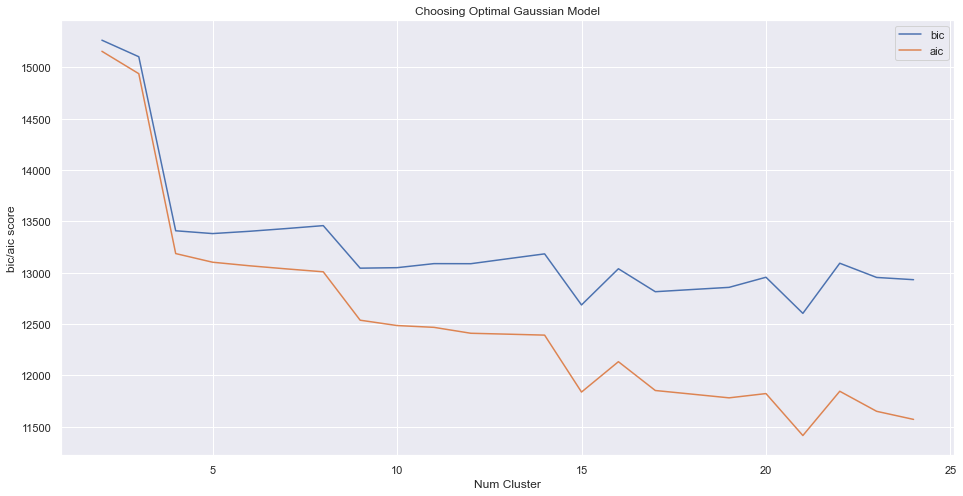

In [193]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [195]:
x = pd.DataFrame(seafood.iloc[:,1:4])

model = GaussianMixture(n_components=21, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
seafood['cluster'] = labels

seafood.groupby('cluster').median()

,log fat,log sodium,log sat fat,recipe_id,total fat (PDV),saturated fat (PDV),sodium (PDV)
cluster,,,,,,,
0,3.526361,3.401197,3.555348,169983.0,34.0,35.0,30.0
1,2.302585,3.135494,1.791759,150214.5,10.0,6.0,23.0
2,4.025352,3.067782,4.304065,143964.5,56.0,74.0,21.5
3,2.673554,2.197225,2.564949,188303.0,14.5,13.0,9.0
4,0.693147,2.397895,0.000000,178768.0,2.0,1.0,11.0
5,3.637586,3.091042,4.304065,128059.5,38.0,74.0,22.0
6,2.995732,2.944439,2.302585,162670.0,20.0,10.0,19.0
7,1.098612,0.693147,1.386294,147029.0,3.0,4.0,2.0
8,1.098612,3.610553,0.000000,183876.0,3.0,1.0,37.0


In [230]:
g1_seafood = [1,3,4,6,7,11,12,14,16,17,18,20] #healthy
g2_seafood = [0,2,5,8,9,10,15] # moderately unhealthy
g3_seafood = [13,19] # unhealthy

In [231]:
seafood['groups'] = 0
for i, r in seafood.iterrows():
    if r['cluster'] in g1_seafood:
        seafood.at[i,'groups'] = 1
    elif r['cluster'] in g2_seafood:
        seafood.at[i,'groups'] = 2
    elif r['cluster'] in g3_seafood:
        seafood.at[i,'groups'] = 3

In [232]:
import random

for i in range(1, 4):
    recipe = seafood[seafood["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  275743
Recipe Name:  ['shrimp pil pil   rachael ray']
STEPS: 
["['in a large , heavy skillet , heat the olive oil over medium-high heat', 'add the garlic , crushed red pepper , and paprika , and cook for 30 seconds , stirring constantly', 'season the shrimp with salt , add them to the skillet , and cook until opaque , 1 to 2 minutes on each side', 'remove from the heat', 'stir in parsley', 'transfer the shrimp mixture to a bowl and serve with bread for dipping and mopping']"]
DESCRIPTION:
['a tasty, easy dish from everyday with rachael ray magazine, november 2007.']
INGREDIENTS:
["['extra virgin olive oil', 'garlic cloves', 'crushed red pepper flakes', 'smoked paprika', 'large shrimp', 'salt', 'flat leaf parsley', 'crusty bread']"]

recipe 2:  23656
Recipe Name:  ['man s tuna spread']
STEPS: 
["['put all the ingredients in a food processor', 'whiz', 'serve with any shaped crackers- vegetable biscuits , ritz , triscuits , etc']"]
DESCRIPTION:
["this is a 'manly' tuna

### Meat - fat and sodium

In [196]:
meat = full_dataset[['category','log fat','log sodium','log sat fat','recipe_id','total fat (PDV)','saturated fat (PDV)','sodium (PDV)']]
meat = meat[meat['category'] == 'meat']
meat.drop_duplicates(inplace=True)

In [197]:
x = pd.DataFrame(meat.iloc[:,1:4])

# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  52143.17752918921
aic Score:  52009.49603851682

cluster number:  3
bic score:  51788.16905723031
aic Score:  51584.128887256666

cluster number:  4
bic score:  51809.62232115635
aic Score:  51535.22347188145

cluster number:  5
bic score:  51586.94340509956
aic Score:  51242.18587652341

cluster number:  6
bic score:  48074.61059559656
aic Score:  47659.49438771915

cluster number:  7
bic score:  48161.36437581222
aic Score:  47675.889488633555

cluster number:  8
bic score:  48100.323245788866
aic Score:  47544.48967930894

cluster number:  9
bic score:  47316.61245454716
aic Score:  46690.42020876598

cluster number:  10
bic score:  46908.49394513025
aic Score:  46211.94302004781

cluster number:  11
bic score:  46932.25866993274
aic Score:  46165.349065549046

cluster number:  12
bic score:  47015.80491225909
aic Score:  46178.53662857414

cluster number:  13
bic score:  47109.47337879336
aic Score:  46201.84641580715

cluster number:  14
bic score:  

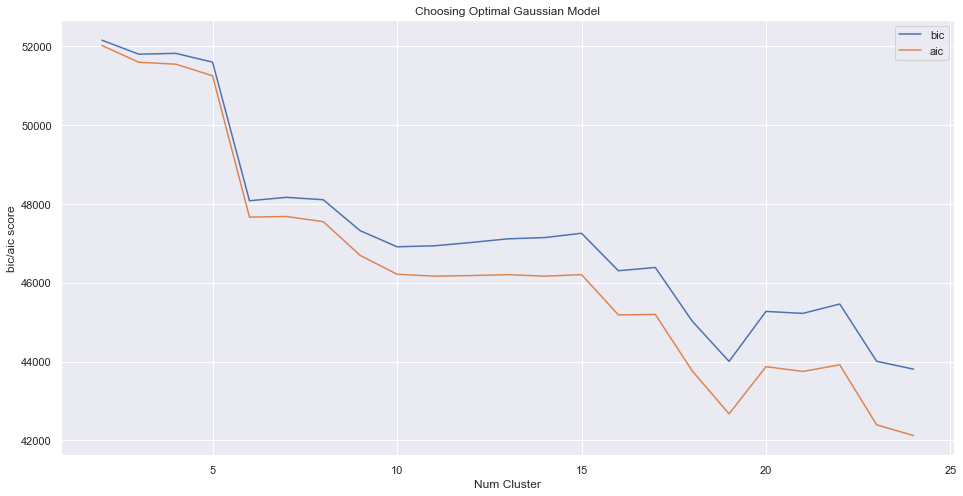

In [198]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [199]:
x = pd.DataFrame(meat.iloc[:,1:4])

model = GaussianMixture(n_components=25, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
meat['cluster'] = labels

meat.groupby('cluster').median()

,log fat,log sodium,log sat fat,recipe_id,total fat (PDV),saturated fat (PDV),sodium (PDV)
cluster,,,,,,,
0,3.218876,3.465736,3.367296,166561.5,25.0,29.0,32.0
1,1.386294,2.564949,1.098612,168027.5,4.0,3.0,13.0
2,4.382027,3.401197,4.564348,154059.0,80.0,96.0,30.0
3,4.317488,2.197225,4.488636,146177.0,75.0,89.0,9.0
4,2.995732,1.098612,2.995732,159667.5,20.0,20.0,3.0
5,3.433987,3.988984,3.583519,143770.0,31.0,36.0,54.0
6,2.708050,3.891820,2.564949,155837.0,15.0,13.0,49.0
7,4.477337,4.543295,4.709530,152596.0,88.0,111.0,94.0
8,0.693147,2.708050,0.000000,202772.5,2.0,1.0,15.0


In [233]:
g1_meat= [0,1,4,8,9,10,13,14,15,16,23,24] # healthy

g2_meat = [2,3,5,6,11,17,18,19,20] # moderately unhealthy

g3_meat = [7,12,21,22] # unhealthy

In [234]:
meat['groups'] = 0
for i, r in meat.iterrows():
    if r['cluster'] in g1_meat:
        meat.at[i,'groups'] = 1
    elif r['cluster'] in g2_meat:
        meat.at[i,'groups'] = 2
    elif r['cluster'] in g3_meat:
        meat.at[i,'groups'] = 3

In [235]:
import random

for i in range(1, 4):
    recipe = meat[meat["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  134700
Recipe Name:  ['iowa style loose meat sandwiches']
STEPS: 
["['in a skillet , brown the beef over medium-high heat , stirring to crumble', 'drain in a colander', 'return beef to pan', 'stir in onion flakes , pepper , salt , sugar , mustard , and beer', 'simmer , partially covered , over medium heat until liquid is evaporated (about 30 minutes', 'to make a loosemeat sandwich: spoon beef into buns', 'serve immediately with chopped onion , mustard , and pickles', 'make sure everyone has a spoon so they can scoop up any stray beef that escapes']"]
DESCRIPTION:
["the origins of this sandwich are disputed. a typical loosemeat sandwich consists of twice-ground beef cooked and seasoned with a secret ingredient or two, piled into hamburger buns and topped off with mustard, pickles, and chopped onions--never ketchup. taylor's maid-rite in marshalltown, iowa will  ship frozen maid-rites to your door."]
INGREDIENTS:
["['ground beef', 'dried onion flakes', 'ground black p

### Soup - sodium

In [200]:
soup = full_dataset[['category','log sodium','recipe_id','sodium (PDV)']]
soup = soup[soup['category'] == 'soup']
soup.drop_duplicates(inplace=True)

In [201]:
x = soup.iloc[:,1]
x = pd.DataFrame(x)

# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  6123.438258487545
aic Score:  6095.206489875315

cluster number:  3
bic score:  6124.952473489567
aic Score:  6079.781643709999

cluster number:  4
bic score:  4836.64657313345
aic Score:  4774.536682186545

cluster number:  5
bic score:  4867.418652194955
aic Score:  4788.3697000807115

cluster number:  6
bic score:  4876.45325433891
aic Score:  4780.465241057327

cluster number:  7
bic score:  4309.188086392195
aic Score:  4196.261011943275

cluster number:  8
bic score:  4300.081004276315
aic Score:  4170.214868660057

cluster number:  9
bic score:  4320.786046870765
aic Score:  4173.980850087169

cluster number:  10
bic score:  4341.3937881063985
aic Score:  4177.649530155464

cluster number:  11
bic score:  4352.412400379934
aic Score:  4171.729081261662

cluster number:  12
bic score:  4021.2182497149715
aic Score:  3823.5958694293613

cluster number:  13
bic score:  4050.691233661145
aic Score:  3836.1297922081967

cluster number:  14
bic score:  4

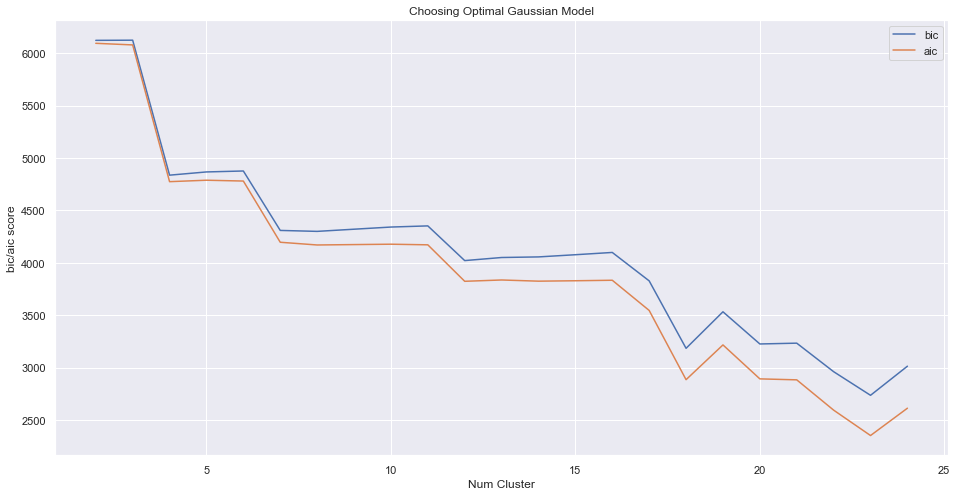

In [202]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [203]:
x = soup.iloc[:,1]
x = pd.DataFrame(x)

model = GaussianMixture(n_components=23, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
soup['cluster'] = labels

soup.groupby('cluster').median()

,log sodium,recipe_id,sodium (PDV)
cluster,,,
0,3.465736,153885.0,32.0
1,1.386294,160403.0,4.0
2,4.369448,156540.0,79.0
3,0.000000,173526.0,1.0
4,2.302585,194477.5,10.0
5,2.564949,169319.0,13.0
6,3.044522,180172.0,21.0
7,3.921924,168807.0,50.5
8,6.368187,186693.0,583.0


In [236]:
g1_soup = [0,1,3,4,5,6,9,11,13,14,17,20,21,22] # healthy

g2_soup = [2,7,12,15,19] # moderately unhealthy

g3_soup = [8,10,16,18] # unhealthy

In [237]:
soup['groups'] = 0
for i, r in soup.iterrows():
    if r['cluster'] in g1_soup:
        soup.at[i,'groups'] = 1
    elif r['cluster'] in g2_soup:
        soup.at[i,'groups'] = 2
    elif r['cluster'] in g3_soup:
        soup.at[i,'groups'] = 3

In [238]:
import random

for i in range(1, 4):
    recipe = soup[soup["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  60897
Recipe Name:  ['chia s gazpacho']
STEPS: 
["['puree first 4 ingredients in processor', 'reserve 1 / 2 c each tomatoes , cucumbers , green pepper , then add all the rest of the ingredients to processor , pulse until chunky', 'chill , 1-6 hours', 'garnish with reserved vegetables and extra tabasco , and sour cream , to taste']"]
DESCRIPTION:
['this is probably my favorite summer food-salad in a mug. it is very refreshing, not to mention low fat, low calorie, but full of vitamins and flavor']
INGREDIENTS:
["['onion', 'garlic', 'extra virgin olive oil', 'red wine vinegar', 'tomatoes', 'cucumber', 'green pepper', 'tomato paste', 'salt', 'cilantro', 'tomato juice', 'tabasco sauce', 'sour cream']"]

recipe 2:  373851
Recipe Name:  ['bahamian conch chowder']
STEPS: 
["['heat the oil in a large sauce pot over medium heat', 'saute the onion , celery , carrots , red pepper , potato , thyme , red chili flakes , allspice , and bay leaves for 5 minutes , until they began to

### Burgers - fat and sodium

In [204]:
burgers = full_dataset[['category','log fat','log sodium','log sat fat','recipe_id','total fat (PDV)','saturated fat (PDV)','sodium (PDV)']]
burgers = burgers[burgers['category'] == 'burgers']
burgers.drop_duplicates(inplace=True)

In [205]:
x = pd.DataFrame(burgers.iloc[:,1:4])

# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  289.0320169628161
aic Score:  248.61646364695937

cluster number:  3
bic score:  312.7672964719344
aic Score:  251.0803993056267

cluster number:  4
bic score:  291.40829165392756
aic Score:  208.45005063716903

cluster number:  5
bic score:  304.65765321859465
aic Score:  200.42806835138518

cluster number:  6
bic score:  316.21338375131734
aic Score:  190.71245503365694

cluster number:  7
bic score:  307.09153546866696
aic Score:  160.31926290055563

cluster number:  8
bic score:  363.6079996082645
aic Score:  195.56438318970226

cluster number:  9
bic score:  370.4989283893931
aic Score:  181.18396812037992

cluster number:  10
bic score:  385.4290095505236
aic Score:  174.84270543105947

cluster number:  11
bic score:  394.080632489133
aic Score:  162.22298451921802

cluster number:  12
bic score:  413.4250847721179
aic Score:  160.296092951752

cluster number:  13
bic score:  433.8780754615492
aic Score:  159.4777397907324

cluster number:  14
bic s

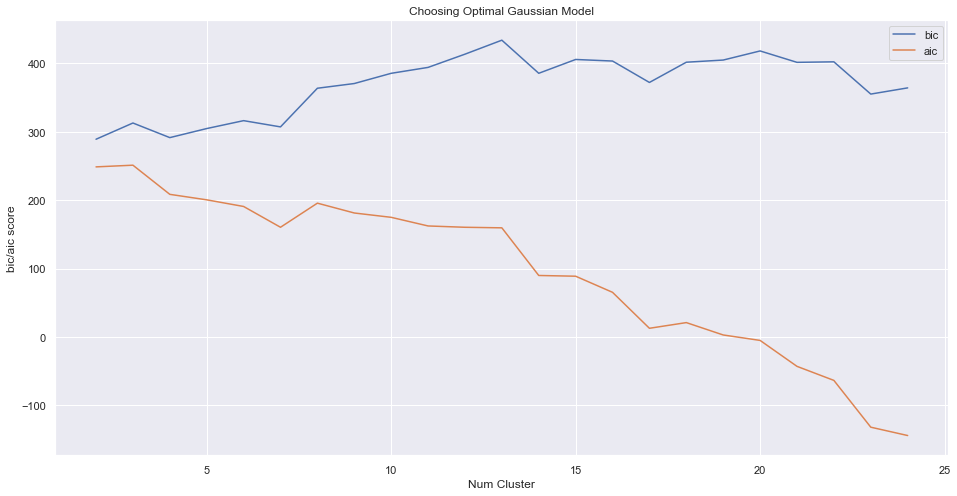

In [206]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [207]:
x = pd.DataFrame(burgers.iloc[:,1:4])

model = GaussianMixture(n_components=2, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
burgers['cluster'] = labels

burgers.groupby('cluster').median()

,log fat,log sodium,log sat fat,recipe_id,total fat (PDV),saturated fat (PDV),sodium (PDV)
cluster,,,,,,,
0,3.465736,3.091042,3.637586,125516,32.0,38.0,22.0
1,1.791759,1.945910,1.386294,123779,6.0,4.0,7.0


In [239]:
g1_burgers = [1] # healthy

g2_burgers = [0] # moderately unhealthy

g3_burgers = [] # unhealthy

In [240]:
burgers['groups'] = 0
for i, r in burgers.iterrows():
    if r['cluster'] in g1_burgers:
        burgers.at[i,'groups'] = 1
    elif r['cluster'] in g2_burgers:
        burgers.at[i,'groups'] = 2
    elif r['cluster'] in g3_burgers:
        burgers.at[i,'groups'] = 3

In [241]:
import random

for i in range(1, 4):
    recipe = burgers[burgers["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  110944
Recipe Name:  ['spicy mexican bean burger']
STEPS: 
["['heat oil in skillet over medium heat', 'add onions , carrots , corn and chopped green pepper', 'in the meantime , place beans in a large bowl', 'saut until vegetables are bright in color', 'add vegetables to beans , blend with hand mixer', 'add remaining ingredients , adding more flour to create a firmer mixture , or more salsa if mixture is too stiff', 'form into balls and smash into patties', 'place on pieces of waxed paper and stack in tupperware', 'place about 5 sliced olives in middle of patty , smash to seal them inside', 'to heat , spray each burger with cooking spray', 'heat over medium heat and cook until browned on one side', 'flip and drop a few drops of hot sauce on burger if desired', 'i serve these with salsa , chopped onions and a cheese slice on a toasted burger bun']"]
DESCRIPTION:
["this is an inexpensive vegetarian burger and my husband loves them. he ate one and he said they are filli

IndexError: single positional indexer is out-of-bounds

### Salads - sugar and fat

In [208]:
salads = full_dataset[['category','log fat','log sugar','log sat fat','recipe_id','total fat (PDV)','saturated fat (PDV)','sugar (PDV)']]
salads = salads[salads['category'] == 'salads']
salads.drop_duplicates(inplace=True)

In [209]:
x = pd.DataFrame(salads.iloc[:,1:4])

# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  12293.493165327567
aic Score:  12193.068540905635

cluster number:  3
bic score:  7987.251658038123
aic Score:  7833.9719681309625

cluster number:  4
bic score:  7222.891936812167
aic Score:  7016.757181419778

cluster number:  5
bic score:  7809.416702710677
aic Score:  7550.42688183306

cluster number:  6
bic score:  8268.604291712261
aic Score:  7956.759405349417

cluster number:  7
bic score:  7412.953282590632
aic Score:  7048.253330742559

cluster number:  8
bic score:  7388.741693489438
aic Score:  6971.186676156138

cluster number:  9
bic score:  6585.265989966655
aic Score:  6114.855907148127

cluster number:  10
bic score:  6635.166486566417
aic Score:  6111.901338262662

cluster number:  11
bic score:  6530.904453363291
aic Score:  5954.784239574308

cluster number:  12
bic score:  6590.513684953792
aic Score:  5961.538405679581

cluster number:  13
bic score:  6644.222658459206
aic Score:  5962.392313699767

cluster number:  14
bic score:  65

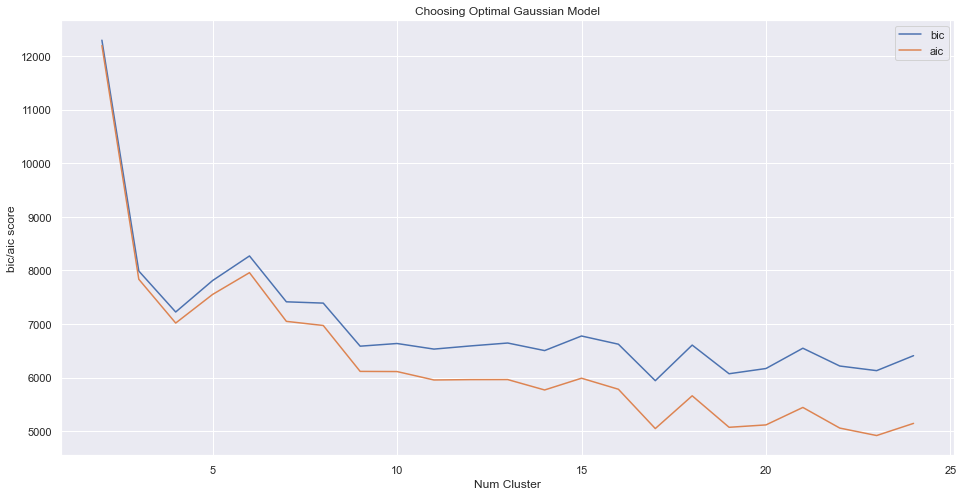

In [210]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [211]:
x = pd.DataFrame(salads.iloc[:,1:4])

model = GaussianMixture(n_components=23, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
salads['cluster'] = labels

salads.groupby('cluster').median()

,log fat,log sugar,log sat fat,recipe_id,total fat (PDV),saturated fat (PDV),sugar (PDV)
cluster,,,,,,,
0,3.258097,4.016342,2.772589,209166.0,26.0,16.0,55.5
1,0.000000,2.740319,0.000000,174720.5,0.0,0.0,15.5
2,2.995732,1.945910,2.995732,177020.0,20.0,20.0,7.0
3,3.091042,0.693147,2.484907,162387.0,22.0,12.0,2.0
4,5.062595,4.532599,4.369448,124248.0,158.0,79.0,93.0
5,2.397895,2.564949,1.609438,187330.0,11.0,5.0,13.0
6,4.477337,5.056246,3.713572,123922.0,88.0,41.0,157.0
7,0.693147,2.944439,0.000000,179839.0,2.0,1.0,19.0
8,2.350240,3.806416,1.791759,173921.5,10.5,6.0,45.0


In [242]:
g1_salad = [1,2,3,5,7,11,12,13,15,18,20,22] # healthy

g2_salad = [0,8,9,14,19,21] # moderately unhealthy

g3_salad = [4,6,10,16,17] # unhealthy

In [243]:
salads['groups'] = 0
for i, r in salads.iterrows():
    if r['cluster'] in g1_salad:
        salads.at[i,'groups'] = 1
    elif r['cluster'] in g2_salad:
        salads.at[i,'groups'] = 2
    elif r['cluster'] in g3_salad:
        salads.at[i,'groups'] = 3

In [244]:
import random

for i in range(1, 4):
    recipe = salads[salads["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  234987
Recipe Name:  ['cherry tomato corn salad']
STEPS: 
["['in a jar with a tight fitting lid , combine the basil , oil , lime juice , sugar , salt and pepper , shake well', 'in a large bowl , combine the corn , tomatoes and cucumber', 'drizzle with dressing and toss to coat', 'refrigerate until serving']"]
DESCRIPTION:
['this salad is quick, easy and delicious. it is from taste of homes, weeknight cooking made easy. i used frozen sweet white corn.']
INGREDIENTS:
["['fresh basil', 'olive oil', 'lime juice', 'sugar', 'salt', 'pepper', 'frozen corn', 'cherry tomatoes', 'cucumber']"]

recipe 2:  147769
Recipe Name:  ['ww 3 points   super sandwich stuffed with chicken salad']
STEPS: 
["['combine yogurt , mayonnaise , ginger and cooked chicken together in a large bowl until chicken is well-coated', 'stir in grapes , celery , carrots , scallions and chopped walnuts', 'cover and chill until ready to serve', 'place about 3 romaine lettuce leaves in each pita half', 'add a

### Breads - fat and sodium

In [213]:
breads = full_dataset[['category','log fat','log sodium','log sat fat','recipe_id','total fat (PDV)','saturated fat (PDV)','sodium (PDV)']]
breads = breads[breads['category'] == 'breads']
breads.drop_duplicates(inplace=True)

In [214]:
x = pd.DataFrame(breads.iloc[:,1:4])

# Iterate over possible number of topics.
cluster_param = []
bic = []
aic = []

for k in range(2, 25):
    print('cluster number: ', k)
    ev = gaussian_model(x, k)
    bic.append(ev[0])
    aic.append(ev[1])
    print('bic score: ', ev[0])
    print('aic Score: ', ev[1])
    print()
    
    cluster_param.append(k)

cluster number:  2
bic score:  26084.409615699675
aic Score:  25966.463801636924

cluster number:  3
bic score:  25715.169027432934
aic Score:  25535.14646912663

cluster number:  4
bic score:  22003.324166615563
aic Score:  21761.224864065705

cluster number:  5
bic score:  22032.647649708197
aic Score:  21728.47160291479

cluster number:  6
bic score:  21755.082095437607
aic Score:  21388.829304400646

cluster number:  7
bic score:  21088.57775868047
aic Score:  20660.248223399954

cluster number:  8
bic score:  20192.35868978469
aic Score:  19701.952410260623

cluster number:  9
bic score:  19702.777991093164
aic Score:  19150.294967325543

cluster number:  10
bic score:  19813.77645064332
aic Score:  19199.216682632148

cluster number:  11
bic score:  17879.702562419745
aic Score:  17203.06605016502

cluster number:  12
bic score:  18287.885651663786
aic Score:  17549.172395165508

cluster number:  13
bic score:  18169.057299964526
aic Score:  17368.267299222694

cluster number:  1

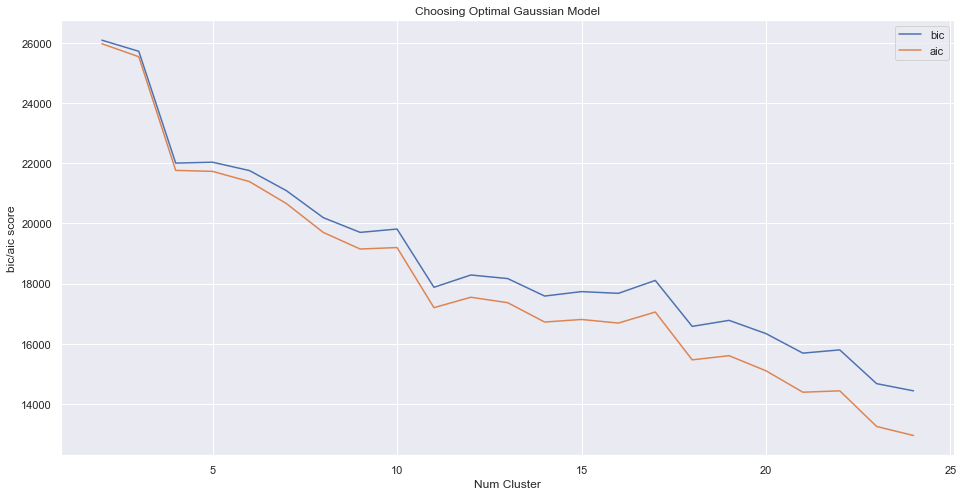

In [215]:
# Show graph
plt.figure(figsize=(16, 8))
plt.plot(cluster_param, bic, label='bic')
plt.plot(cluster_param, aic, label='aic')

plt.title("Choosing Optimal Gaussian Model")
plt.xlabel("Num Cluster")
plt.ylabel("bic/aic score")
plt.legend()
plt.show()

In [216]:
x = pd.DataFrame(breads.iloc[:,1:4])

model = GaussianMixture(n_components=25, n_init=10, random_state=42, init_params='kmeans')

model.fit(x)
labels = model.predict(x)
breads['cluster'] = labels

breads.groupby('cluster').median()

,log fat,log sodium,log sat fat,recipe_id,total fat (PDV),saturated fat (PDV),sodium (PDV)
cluster,,,,,,,
0,1.791759,2.197225,1.098612,151089.0,6.0,3.0,9.0
1,3.044522,2.397895,2.708050,134874.0,21.0,15.0,11.0
2,5.209486,4.574711,4.543295,127135.0,183.0,94.0,97.0
3,3.583519,3.806662,3.637586,111288.0,36.0,38.0,45.0
4,1.791759,2.197225,2.302585,136479.0,6.0,10.0,9.0
5,2.639057,3.258097,2.302585,136796.0,14.0,10.0,26.0
6,1.386294,2.302585,1.791759,136418.0,4.0,6.0,10.0
7,0.000000,1.945910,0.000000,154449.0,1.0,0.0,7.0
8,2.302585,2.397895,2.564949,141732.0,10.0,13.0,11.0


In [245]:
g1_bread = [0,1,4,5,6,7,8,9,12,13,17,18,19,21,22,23,24] # healthy

g2_bread = [3,10,11,15] # moderately unhealthy

g3_bread = [2,14,16,20] # unhealthy

In [246]:
breads['groups'] = 0
for i, r in breads.iterrows():
    if r['cluster'] in g1_bread:
        breads.at[i,'groups'] = 1
    elif r['cluster'] in g2_bread:
        breads.at[i,'groups'] = 2
    elif r['cluster'] in g3_bread:
        breads.at[i,'groups'] = 3

In [247]:
import random

for i in range(1, 4):
    recipe = breads[breads["groups"] == i]
    r1 = random.randint(0, len(recipe))
    r2 = random.randint(0, len(recipe))
    r3 = random.randint(0, len(recipe))
    
    
    print("group ", i)
    r1_id = recipe.iloc[r1]['recipe_id']
    print ("recipe 1: ", r1_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r1_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r1_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r1_id]['ingredients'].values)
    print()

    r2_id = recipe.iloc[r2]['recipe_id']
    print ("recipe 2: ", r2_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r2_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r2_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r2_id]['ingredients'].values)
    print()

    r3_id = recipe.iloc[r3]['recipe_id']
    print ("recipe 3: ", r3_id)
    print("Recipe Name: ", raw_recipes[raw_recipes['id'] == r3_id]['name'].values)
    print('STEPS: ')
    print(raw_recipes[raw_recipes['id'] == r3_id]['steps'].values)
    print('DESCRIPTION:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['description'].values)
    print('INGREDIENTS:')
    print(raw_recipes[raw_recipes['id'] == r3_id]['ingredients'].values)
    print('*' * 50)

group  1
recipe 1:  154636
Recipe Name:  ['weight watcher 1 point banana bread  flex points']
STEPS: 
["['preheat oven to 350 degrees', 'in a mixer , mash bananas , add splenda and mix', 'mix in rest of indgredients', 'pour ingredients into a bread pan sprayed with non-stick spray', 'bake for 50 to 60 minutes', 'cake tester should come out clean when done', 'remove from pan and cool on a wire rack', 'if using a dark coated pan , bake at 325 degrees and bake a little longer', 'cake tester to should come out clean when done']"]
DESCRIPTION:
["moist and tasty!  for those on ww, it's an easy, economical homemade alternative to buying the overpriced ww baked goods in the grocery store.  this recipe is courtesy of the ww website."]
INGREDIENTS:
["['bananas', 'splenda sugar substitute', 'natural applesauce', 'all-purpose flour', 'whole wheat flour', 'salt', 'baking soda']"]

recipe 2:  53639
Recipe Name:  ['jazz fest sweet potato pone']
STEPS: 
["['preheat oven to 375f', 'cook the potatoes un

## Classification

In [248]:
df_group = pd.DataFrame(beverages[['category','recipe_id','groups']])
df_group = df_group.append(desserts[['category','recipe_id','groups']])
df_group = df_group.append(vegetables[['category','recipe_id','groups']])
df_group = df_group.append(pasta[['category','recipe_id','groups']])
df_group = df_group.append(seafood[['category','recipe_id','groups']])
df_group = df_group.append(meat[['category','recipe_id','groups']])
df_group = df_group.append(soup[['category','recipe_id','groups']])
df_group = df_group.append(burgers[['category','recipe_id','groups']])
df_group = df_group.append(salads[['category','recipe_id','groups']])
df_group = df_group.append(breads[['category','recipe_id','groups']])

In [249]:
df_group

,category,recipe_id,groups
0,beverages,5315,2
123,beverages,13267,3
135,beverages,13366,2
142,beverages,15292,2
205,beverages,15438,1
...,...,...,...
65045,breads,125091,3
65056,breads,340051,1
65090,breads,283103,1
65126,breads,387857,1


In [250]:
df_healthy = df_group.merge(full_dataset, how="inner", on="recipe_id")

In [251]:
df_healthy.drop('category_x', axis = 1, inplace=True)
df_healthy.rename(columns = {'category_y': 'category'}, inplace=True)
df_healthy

,recipe_id,groups,category,name,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),...,log sugar,log sodium,log protein,log sat fat,log carbs,user_id,date,review,rating,description
0,5315,2,beverages,icy holiday punch,6,1440,54.5,0.0,50.0,0.0,...,3.912023,0.000000,0.000000,0.000000,1.386294,8629,2001-04-24,I brought this to an office holiday party and ...,4,.
1,13267,3,beverages,very rich hot buttered rum,8,11,265.3,21.0,132.0,5.0,...,4.882802,1.609438,0.000000,3.784190,2.397895,22015,2001-12-26,"I had never had Hot Buttered Rum before, but t...",5,we love keeping this on hand for the cold nigh...
2,13267,3,beverages,very rich hot buttered rum,8,11,265.3,21.0,132.0,5.0,...,4.882802,1.609438,0.000000,3.784190,2.397895,27783,2002-11-14,"Delicious, warm and comforting! Very easy to ...",5,we love keeping this on hand for the cold nigh...
3,13366,2,beverages,spiced cocoa,5,7,48.6,0.0,44.0,0.0,...,3.784190,0.000000,0.000000,0.000000,1.386294,21752,2002-01-07,"I am a fan of spicy hot cocoa, and this one re...",5,this is a twist on the usual hot chocolate. se...
4,13366,2,beverages,spiced cocoa,5,7,48.6,0.0,44.0,0.0,...,3.784190,0.000000,0.000000,0.000000,1.386294,27783,2002-01-22,"I made this twice - the first time, I followed...",4,this is a twist on the usual hot chocolate. se...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65179,125091,3,breads,lower fat cinnamon swirl quick bread,11,70,2587.3,46.0,1388.0,115.0,...,7.235619,4.744932,4.394449,3.401197,5.204007,1535,2010-04-06,It definitely doesn't taste low fat! Not quite...,4,this is an easy and delicious cinnamon swirl b...
65180,340051,1,breads,cinnamon raisin biscuits hardees clone,6,10,65.5,4.0,33.0,1.0,...,3.496508,0.000000,0.000000,2.079442,1.098612,632249,2010-04-06,This is certainly simple and quite fast to put...,5,fabulous copycat version of hardees cinnamon r...
65181,283103,1,breads,coffee choc chip muffins,11,35,270.0,19.0,73.0,11.0,...,4.290459,2.397895,1.945910,3.663562,2.484907,329769,2010-04-08,* Reviewed for PAC April 2010 * I made these w...,5,these are good!
65182,387857,1,breads,easy cheese muffins,5,30,174.4,11.0,2.0,12.0,...,0.693147,2.484907,2.397895,2.708050,1.791759,201581,2010-04-08,I made these tasty muffins to go with Recipe ...,5,i adapted this recipe from a cookbook publishe...


In [252]:
df_healthy.sort_values(by='date', inplace=True)

In [253]:
df_healthy

,recipe_id,groups,category,name,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),...,log sugar,log sodium,log protein,log sat fat,log carbs,user_id,date,review,rating,description
0,5315,2,beverages,icy holiday punch,6,1440,54.5,0.0,50.0,0.0,...,3.912023,0.000000,0.000000,0.000000,1.386294,8629,2001-04-24,I brought this to an office holiday party and ...,4,.
57440,8661,1,salads,oliveau salad dressing,8,20,168.7,28.0,3.0,3.0,...,1.098612,1.098612,0.000000,2.484907,0.000000,13483,2001-08-05,Good recipe and easy to make. I found it a li...,4,traditional french dressing -- this recipe was...
16373,10859,2,vegetables,broccoli cauliflower and rice casserole,5,85,228.8,24.0,12.0,46.0,...,2.484907,3.828641,2.890372,3.465736,1.386294,8629,2001-08-15,This is a nice casserole. It is very easy to ...,2,easy and quick to prepare. grandmother's recip...
16375,902,2,vegetables,microwaved garlic mushroom rolls,7,0,1188.6,88.0,53.0,69.0,...,3.970292,4.234107,4.317488,5.030438,3.828641,13483,2001-08-16,Very easy to make for a lunch. I served it co...,3,"i use brown flat mushrooms and slice them, i f..."
5114,8430,2,desserts,lemon blueberry bundt cake,10,70,234.0,13.0,89.0,10.0,...,4.488636,2.302585,1.791759,3.258097,2.484907,13483,2001-09-04,I made this and froze it. I served it a week ...,4,delicious bundt cake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57276,268004,1,soup,mashed potato and turkey soup,9,30,243.7,12.0,13.0,18.0,...,2.564949,2.890372,3.663562,2.890372,2.079442,125388,2010-04-09,"This was good, and gives a lot of flavor for h...",4,a simple recipe for leftovers. souper easy an...
57275,145707,1,soup,becky s taco soup,9,75,476.2,12.0,2.0,23.0,...,0.693147,3.135494,4.158883,2.639057,3.178054,28177,2010-04-09,"Becky's a good friend to have around, farmwife...",5,this is the soup that my friend becky brings w...
30988,89292,1,vegetables,committee salad,14,15,301.5,43.0,18.0,7.0,...,2.890372,1.945910,2.197225,3.178054,1.098612,333017,2010-04-09,I found this recipe in the Best of Bridge seri...,4,from the best of bridge series - winners book
26601,291504,1,vegetables,mustard crusted roast new potatoes with shallo...,7,55,201.0,15.0,4.0,0.0,...,1.386294,0.000000,1.791759,1.945910,2.079442,192581,2010-04-09,"Okay, instead of the coarse grain mustard I us...",5,a flavour packed roast potato recipe which res...


In [254]:
df_healthy.to_csv('./Dataset/train_healthy.csv', index=False)